<a href="https://colab.research.google.com/github/noternata/VK_lab/blob/main/VK_lab_Bukanovskaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузим датасет

In [4]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/AI_Datasets/post2ctr_dataset.csv")

In [5]:
data.head()

,view,like,comment,hide,expand,open_photo,open,share_to_message,text,photo
0,10869,185,0,2,0,1947,14,20,NaN,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,9083,227,1,7,4,958,23,2,• &#128571;,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,5352,25,5,12,598,430,114,4,"Новость, конечно, старенькая, но все равно инт...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3,4260,539,5,3,1,138,62,24,Фантазийные бриллианты.,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
4,5676,112,2,4,371,271,499,4,Сегодня на стадионе «Динамо» прошли соревнован...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


In [6]:
print(data.isnull().sum())

view                   0
like                   0
comment                0
hide                   0
expand                 0
open_photo             0
open                   0
share_to_message       0
text                4205
photo                  0
dtype: int64


In [7]:
data['text'].fillna('no_text', inplace=True)

In [8]:
print(data.isnull().sum())

view                0
like                0
comment             0
hide                0
expand              0
open_photo          0
open                0
share_to_message    0
text                0
photo               0
dtype: int64


In [9]:
data.describe()

,view,like,comment,hide,expand,open_photo,open,share_to_message
count,2.352700e+04,23527.000000,23527.000000,23527.000000,23527.000000,23527.000000,2.352700e+04,23527.000000
mean,2.017510e+04,382.532580,10.259064,10.739576,780.819697,888.538275,5.957260e+02,55.747907
std,7.954857e+04,1447.320109,70.074167,47.420019,10652.744305,6065.675125,9.374567e+03,288.719215
min,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,3.709000e+03,27.000000,0.000000,0.000000,0.000000,49.000000,1.400000e+01,2.000000
50%,7.333000e+03,96.000000,2.000000,2.000000,7.000000,153.000000,5.600000e+01,8.000000
75%,1.659850e+04,305.000000,7.000000,7.000000,224.500000,488.000000,2.360000e+02,31.000000
max,7.010336e+06,67834.000000,5561.000000,2899.000000,987856.000000,440489.000000,1.163508e+06,13328.000000


Проведем предобработку текста

In [10]:
import re

data['text'] = data['text'].apply(lambda x: x.lower())  # нижний регистр
data['text'] = data['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x)) # оставляем только буквы и пробелы

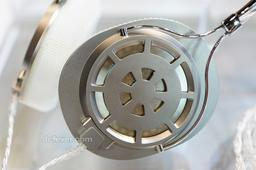

In [11]:
from base64 import b64decode
from io import BytesIO
from PIL import Image
from IPython.display import display

img_index = 2
img = Image.open(BytesIO(b64decode(data.loc[img_index, "photo"])))
display(img)

In [12]:
def is_valid_image(base64_str):
    try:
        img = Image.open(BytesIO(b64decode(base64_str)))
        img.verify()
        return True
    except Exception as e:
        return False

data['image_valid'] = data['photo'].apply(lambda x: is_valid_image(x) if pd.notna(x) else False)
valid_images = data['image_valid'].sum()
invalid_images = len(data) - valid_images

print(f"Корректных изображений: {valid_images}")
print(f"Некорректных изображений: {invalid_images}")

Корректных изображений: 23527
Некорректных изображений: 0


In [13]:
data = data.drop(columns=['image_valid'])

In [14]:
data.head()

,view,like,comment,hide,expand,open_photo,open,share_to_message,text,photo
0,10869,185,0,2,0,1947,14,20,no_text,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,9083,227,1,7,4,958,23,2,128571,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,5352,25,5,12,598,430,114,4,новость конечно старенькая но все равно интере...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3,4260,539,5,3,1,138,62,24,фантазийные бриллианты,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
4,5676,112,2,4,371,271,499,4,сегодня на стадионе динамо прошли соревнования...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


EDA

In [15]:
data.describe()

,view,like,comment,hide,expand,open_photo,open,share_to_message
count,2.352700e+04,23527.000000,23527.000000,23527.000000,23527.000000,23527.000000,2.352700e+04,23527.000000
mean,2.017510e+04,382.532580,10.259064,10.739576,780.819697,888.538275,5.957260e+02,55.747907
std,7.954857e+04,1447.320109,70.074167,47.420019,10652.744305,6065.675125,9.374567e+03,288.719215
min,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,3.709000e+03,27.000000,0.000000,0.000000,0.000000,49.000000,1.400000e+01,2.000000
50%,7.333000e+03,96.000000,2.000000,2.000000,7.000000,153.000000,5.600000e+01,8.000000
75%,1.659850e+04,305.000000,7.000000,7.000000,224.500000,488.000000,2.360000e+02,31.000000
max,7.010336e+06,67834.000000,5561.000000,2899.000000,987856.000000,440489.000000,1.163508e+06,13328.000000


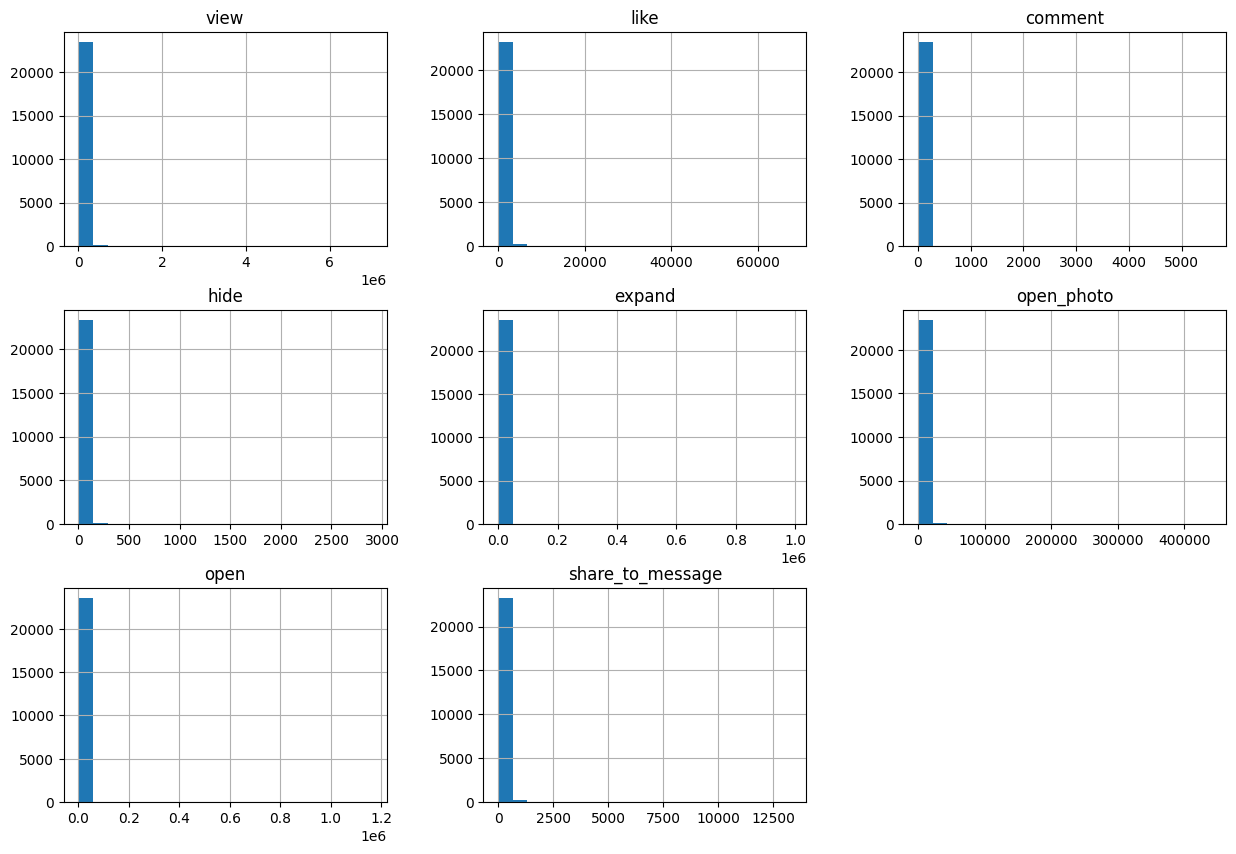

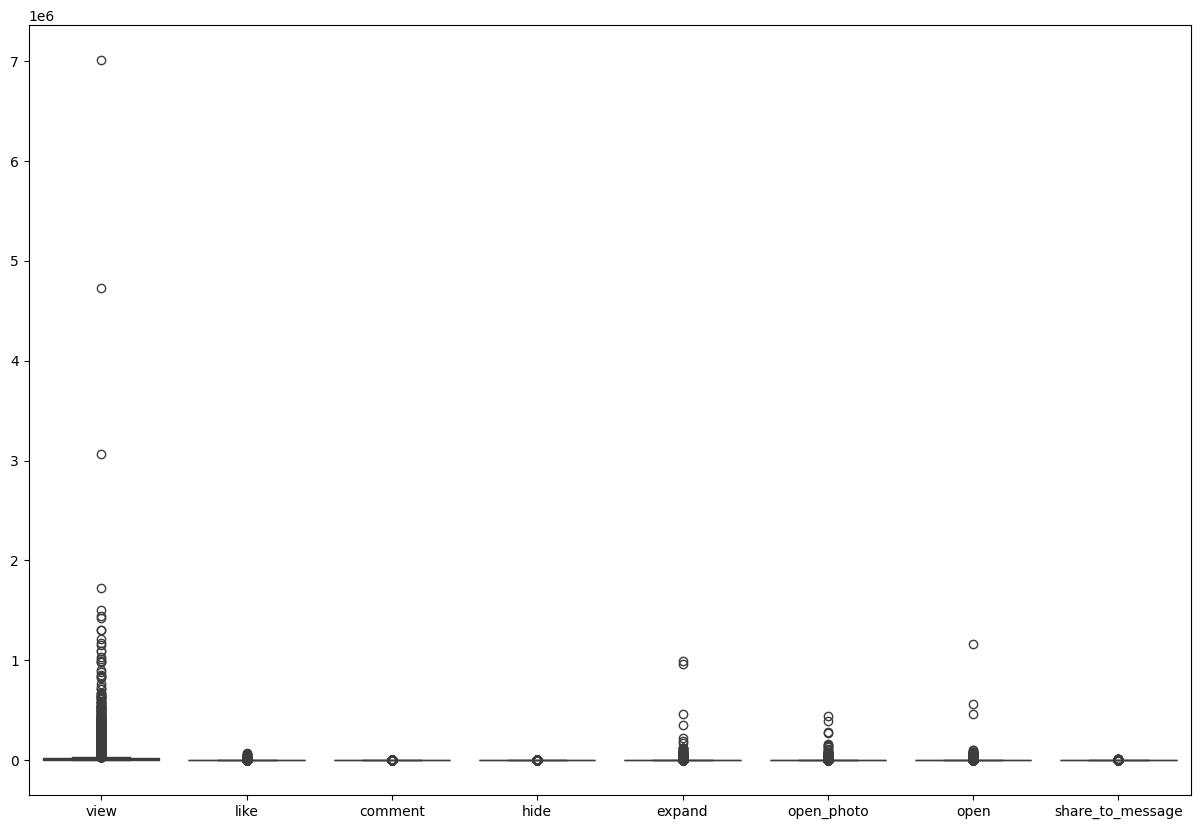

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['view', 'like', 'comment', 'hide', 'expand', 'open_photo', 'open', 'share_to_message']
data[numeric_columns].hist(bins=20, figsize=(15,10))
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=data[numeric_columns])
plt.show()

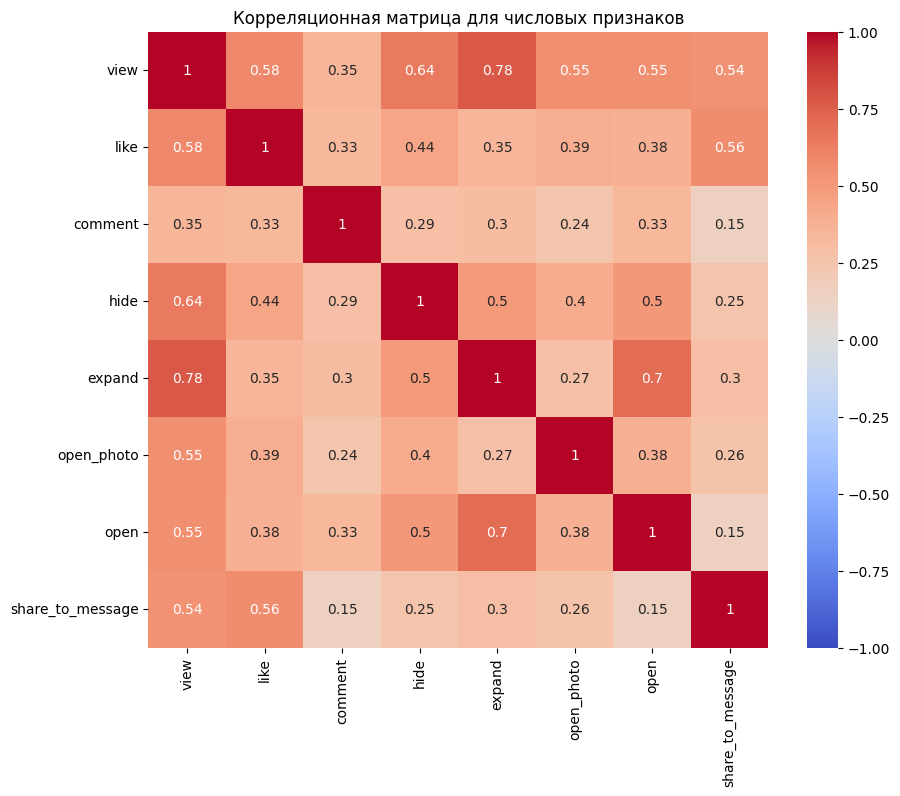

In [17]:
corr_matrix = data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Корреляционная матрица для числовых признаков")
plt.show()

In [18]:
data['like_conversion'] = data['like'].apply(lambda x: 1 if x > 0 else 0)

In [19]:
data['share_conversion'] = data['share_to_message'].apply(lambda x: 1 if x > 0 else 0)

In [20]:
data['comment_conversion'] = data['comment'].apply(lambda x: 1 if x > 0 else 0)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

russian_stop_words = [
    'и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то',
    'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за',
    'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще',
    'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли',
    'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь',
    'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей',
    'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя',
    'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'человек', 'чего',
    'раз', 'тоже', 'себе', 'под', 'жизнь', 'будет', 'ж', 'тогда', 'кто',
    'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь',
    'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были',
    'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два',
    'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти',
    'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту',
    'моя', 'впрочем', 'хорошо', 'свою', 'этой', 'перед', 'иногда', 'лучше',
    'чуть', 'том', 'нельзя', 'такой', 'им', 'более', 'всегда', 'конечно',
    'всю', 'между'
]

tfidf = TfidfVectorizer(max_features=5000, stop_words=russian_stop_words)
text_features = tfidf.fit_transform(data['text'].fillna('no_text'))

In [22]:
print(text_features.shape)

(23527, 5000)


In [ ]:
import numpy as np
from scipy.sparse import hstack

numeric_features = data[['view', 'like', 'comment', 'share_to_message']].values
X = hstack([text_features, numeric_features])  # X - это разреженная матрица
# Определение целевой переменной
y = data['like_conversion'].values

print(X.shape)
print(y.shape)

(23527, 5004)
(23527,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)[:, 1]

log_loss_score = log_loss(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, (y_pred_prob > 0.5).astype(int))
print(f"Log-Loss: {log_loss_score}, Accuracy: {accuracy}")

Log-Loss: 0.0007000331506547819, Accuracy: 1.0


In [ ]:
log_loss_cv = cross_val_score(model, X, y, cv=5, scoring='neg_log_loss')
accuracy_cv = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Средний Log-Loss через кросс-валидацию: {-log_loss_cv.mean()}")
print(f"Средняя Accuracy через кросс-валидацию: {accuracy_cv.mean()}")
print("Распределение классов в y:")
unique, counts = np.unique(y, return_counts=True)
class_distribution = dict(zip(unique, counts))
print(class_distribution)

Средний Log-Loss через кросс-валидацию: 0.0007488393193005056
Средняя Accuracy через кросс-валидацию: 1.0
Распределение классов в y:
{0: 225, 1: 23302}


In [25]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
catboost_model = CatBoostClassifier(iterations=1000, eval_metric='Logloss', random_seed=42, verbose=100)
catboost_model.fit(X_train, y_train)

y_pred_prob_catboost = catboost_model.predict_proba(X_test)[:, 1]
log_loss_score_catboost = log_loss(y_test, y_pred_prob_catboost)
print(f"CatBoost Log-Loss: {log_loss_score_catboost}")

Learning rate set to 0.036075
0:	learn: 0.6153725	total: 691ms	remaining: 11m 30s
100:	learn: 0.0001212	total: 44.3s	remaining: 6m 34s
200:	learn: 0.0001002	total: 1m 11s	remaining: 4m 44s
300:	learn: 0.0001002	total: 1m 38s	remaining: 3m 49s
400:	learn: 0.0000998	total: 2m 5s	remaining: 3m 7s
500:	learn: 0.0000999	total: 2m 33s	remaining: 2m 33s
600:	learn: 0.0000996	total: 3m 1s	remaining: 2m
700:	learn: 0.0000996	total: 3m 47s	remaining: 1m 36s
800:	learn: 0.0000996	total: 4m 14s	remaining: 1m 3s
900:	learn: 0.0000996	total: 4m 42s	remaining: 31.1s
999:	learn: 0.0000996	total: 5m 10s	remaining: 0us
CatBoost Log-Loss: 9.25756355548543e-05


In [ ]:
y_pred_test = model.predict_proba(X_test)[:, 1]

log_loss_test = log_loss(y_test, y_pred_test)
print(f"CatBoost Log-Loss on Test Data: {log_loss_test}")

CatBoost Log-Loss on Test Data: 0.0007000331506547819


In [ ]:
from sklearn.model_selection import cross_val_score

log_loss_cv = cross_val_score(model, X, y, cv=5, scoring='neg_log_loss')
print(f"Средний Log-Loss через кросс-валидацию: {-log_loss_cv.mean()}")

Средний Log-Loss через кросс-валидацию: 0.0007488393193005056


In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=1000,
    depth=6,
    learning_rate=0.01,
    l2_leaf_reg=3.0,
    early_stopping_rounds=50,
    eval_metric='Logloss',
    verbose=100
)

model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

0:	learn: 0.6469921	test: 0.6469224	best: 0.6469224 (0)	total: 2.18s	remaining: 36m 16s
100:	learn: 0.0024050	test: 0.0023562	best: 0.0023562 (100)	total: 1m 1s	remaining: 9m 11s
200:	learn: 0.0003041	test: 0.0002893	best: 0.0002893 (200)	total: 1m 28s	remaining: 5m 52s
300:	learn: 0.0001670	test: 0.0001567	best: 0.0001567 (300)	total: 1m 55s	remaining: 4m 27s
400:	learn: 0.0001173	test: 0.0001091	best: 0.0001091 (400)	total: 2m 24s	remaining: 3m 35s
500:	learn: 0.0000998	test: 0.0000925	best: 0.0000925 (496)	total: 2m 52s	remaining: 2m 51s
600:	learn: 0.0000993	test: 0.0000920	best: 0.0000920 (599)	total: 3m 20s	remaining: 2m 12s
700:	learn: 0.0000993	test: 0.0000920	best: 0.0000920 (700)	total: 3m 47s	remaining: 1m 36s
800:	learn: 0.0000992	test: 0.0000920	best: 0.0000920 (799)	total: 4m 12s	remaining: 1m 2s
900:	learn: 0.0000991	test: 0.0000919	best: 0.0000919 (899)	total: 4m 40s	remaining: 30.9s
999:	learn: 0.0000992	test: 0.0000919	best: 0.0000919 (999)	total: 5m 8s	remaining: 0us

In [ ]:
y_pred_test = model.predict_proba(X_test)[:, 1]
log_loss_test = log_loss(y_test, y_pred_test)
print(f"CatBoost Log-Loss on Test Data: {log_loss_test}")

CatBoost Log-Loss on Test Data: 9.19172589781348e-05


In [ ]:
from imblearn.over_sampling import SMOTE

# Применение SMOTE для балансировки классов
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
model.fit(X_train_balanced, y_train_balanced, eval_set=(X_test, y_test), use_best_model=True)

0:	learn: 0.6467531	test: 0.6468678	best: 0.6468678 (0)	total: 1.46s	remaining: 24m 15s
100:	learn: 0.0021383	test: 0.0021011	best: 0.0021011 (100)	total: 56.7s	remaining: 8m 24s
200:	learn: 0.0002301	test: 0.0002275	best: 0.0002275 (200)	total: 1m 52s	remaining: 7m 26s
300:	learn: 0.0001010	test: 0.0000998	best: 0.0000998 (300)	total: 2m 48s	remaining: 6m 31s
400:	learn: 0.0000694	test: 0.0000686	best: 0.0000686 (400)	total: 3m 45s	remaining: 5m 36s
500:	learn: 0.0000664	test: 0.0000654	best: 0.0000654 (497)	total: 4m 40s	remaining: 4m 39s
600:	learn: 0.0000664	test: 0.0000654	best: 0.0000654 (600)	total: 5m 37s	remaining: 3m 43s
700:	learn: 0.0000663	test: 0.0000654	best: 0.0000654 (700)	total: 6m 31s	remaining: 2m 47s
800:	learn: 0.0000663	test: 0.0000654	best: 0.0000654 (796)	total: 7m 28s	remaining: 1m 51s
900:	learn: 0.0000663	test: 0.0000653	best: 0.0000653 (898)	total: 8m 24s	remaining: 55.5s
999:	learn: 0.0000663	test: 0.0000653	best: 0.0000653 (993)	total: 9m 18s	remaining: 0

In [ ]:
y_pred_test = model.predict_proba(X_test)[:, 1]
log_loss_test = log_loss(y_test, y_pred_test)
print(f"CatBoost Log-Loss on Test Data: {log_loss_test}")

CatBoost Log-Loss on Test Data: 6.530596099531527e-05


In [23]:
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler


numeric_features = data[['view', 'comment', 'share_to_message']].values
scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)

X = hstack([text_features, numeric_features_scaled])
y = data['like'].values

print(X.shape)
print(y.shape)

(23527, 5003)
(23527,)


In [27]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostRegressor(
    iterations=800,
    depth=6,
    learning_rate=0.01,
    l2_leaf_reg=3.5,
    eval_metric='RMSE',
    verbose=100
)

model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100, use_best_model=True)
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

0:	learn: 1458.2251563	test: 1374.2632536	best: 1374.2632536 (0)	total: 501ms	remaining: 6m 40s
100:	learn: 1112.9383977	test: 1150.6507697	best: 1150.6507697 (100)	total: 29.9s	remaining: 3m 26s
200:	learn: 952.7294527	test: 1059.7316188	best: 1059.7316188 (200)	total: 59.1s	remaining: 2m 56s
300:	learn: 868.1426487	test: 1017.0474998	best: 1017.0474998 (300)	total: 1m 28s	remaining: 2m 26s
400:	learn: 832.6472929	test: 1011.3567787	best: 1011.3153208 (398)	total: 1m 57s	remaining: 1m 56s
500:	learn: 809.7908035	test: 1007.5490841	best: 1007.4041343 (491)	total: 2m 28s	remaining: 1m 28s
600:	learn: 787.7542250	test: 1007.5652630	best: 1007.0175175 (501)	total: 3m 4s	remaining: 1m
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1007.017518
bestIteration = 501

Shrink model to first 502 iterations.
RMSE: 1007.0175175013717


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [28]:
model = CatBoostRegressor(
    iterations=1000,
    depth=4,
    learning_rate=0.005,
    l2_leaf_reg=5.0,
    eval_metric='RMSE',
    verbose=100
)

model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100, use_best_model=True)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

0:	learn: 1461.6646876	test: 1376.3377366	best: 1376.3377366 (0)	total: 187ms	remaining: 3m 6s
100:	learn: 1278.8089424	test: 1240.7916099	best: 1240.7916099 (100)	total: 15s	remaining: 2m 13s
200:	learn: 1161.1925521	test: 1153.6444096	best: 1153.6444096 (200)	total: 32.7s	remaining: 2m 9s
300:	learn: 1080.6561967	test: 1104.6686122	best: 1104.6686122 (300)	total: 49.9s	remaining: 1m 55s
400:	learn: 1021.3508512	test: 1075.8781226	best: 1075.8781226 (400)	total: 1m 1s	remaining: 1m 31s
500:	learn: 975.8387779	test: 1055.5069758	best: 1055.5069758 (500)	total: 1m 16s	remaining: 1m 16s
600:	learn: 941.5463092	test: 1045.4809062	best: 1045.4574293 (599)	total: 1m 35s	remaining: 1m 3s
700:	learn: 918.8585518	test: 1039.9100987	best: 1039.9100987 (700)	total: 1m 55s	remaining: 49.4s
800:	learn: 902.8547237	test: 1039.4357062	best: 1038.5079396 (738)	total: 2m 10s	remaining: 32.5s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1038.50794
bestIteration = 738

Shrink model

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


В результате работы было обучена несколько моделей с целевой переменной конверсии лайков, эти модели были переобучены из наличия в данных большого дисбаланса классов

Также было обычно несколько моделей с разными параметрами где в качестве целевой переменной использовалась уже количество лайков, каждая модель была протестирована на тестовом наборе

В результате работы с данными можно сделать вывод что данные достаточно дисбалансированны
Для предсказания количества лайков была выбрана модель CatBoost, которая является мощной градиентно-бустинговой моделью, хорошо подходящей для работы с текстом и смешанными типами данных.